In [1]:
import tensorflow as tf
import pandas as pd
from wandb.keras import WandbCallback
import wandb
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard

2023-12-16 17:40:38.575235: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 17:40:38.575267: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 17:40:38.576281: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-16 17:40:38.582151: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-16 17:40:39.326114: W tensorflow/compiler/tf2

In [2]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [3]:
import datetime


In [4]:
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
insurance["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [6]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [7]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [8]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X) == len(X_train) + len(X_test)

True

In [9]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

2023-12-16 17:41:15.489109: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-16 17:41:15.537209: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
# Build a neural network (sort of like model_2 above)

tf.random.set_seed(42)

# 1. Create a model
wandb.init(project="insurance_regression", name="Dense:10,1.SGD.E:10")
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=["mae"])

tensorboard_callback = TensorBoard(log_dir=wandb.run.dir, histogram_freq=1)

# 3. Fit model
insurance_model_1.fit(X_train, y_train, epochs=100, callbacks=[WandbCallback(), tensorboard_callback])

wandb: Currently logged in as: frackowiak (frackowiak_kajetan). Use `wandb login --relogin` to force relogin


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 8643.5391 - mae: 8643.5391
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7858.2466 - mae: 7858.2466
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7585.8208 - mae: 7585.8208
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7732.8950 - mae: 7732.8950
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7692.3188 - mae: 7692.3188
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7641.6768 - mae: 7641.6768
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7548.0674 - mae: 7548.0674
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7742.3008 - mae: 7742.3008
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7552.4341 - mae: 7552.4341
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7695.3735 - mae: 7695.3735

34/34 [==============================] - 0s 2ms/step - loss: 7523.8584 - mae: 7523.8584
Epoch 80/100
34/34 [==============================] - 0s 2ms/step - loss: 7369.4961 - mae: 7369.4961
Epoch 81/100
34/34 [==============================] - 0s 2ms/step - loss: 7204.3252 - mae: 7204.3252
Epoch 82/100
34/34 [==============================] - 0s 2ms/step - loss: 7288.1694 - mae: 7288.1694
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 7391.6597 - mae: 7391.6597
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 7430.2065 - mae: 7430.2065
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 7514.5386 - mae: 7514.5386
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 7535.0791 - mae: 7535.0791
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 7203.6460 - mae: 7203.6460
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 7352.8594 - mae: 7352.8594
Epo

In [11]:
y_pred = insurance_model_1.predict(X_test)

9/9 [==============================] - 0s 956us/step


In [12]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # PLot model's predicting in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();

In [13]:
print("train_data shape:", X_test.shape)
# print("train_labels shape:", train_labels.shape)

train_data shape: (268, 11)


In [14]:
!pip install tensorflow_probability

import tensorflow_probability as tfp

# Assuming y_train is your tensor
percentile_value = tfp.stats.percentile(y_train, 50.0, interpolation='midpoint')

print("50th Percentile (Median):", percentile_value.numpy())

50th Percentile (Median): 9575.442


In [15]:
tf.reduce_mean(y_train)

<tf.Tensor: shape=(), dtype=float32, numpy=13346.09>

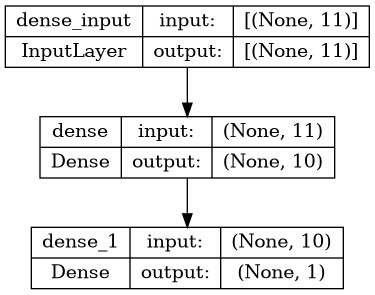

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model=insurance_model_1, show_shapes=True)

In [21]:
# Build a neural network (sort of like model_2 above)

tf.random.set_seed(42)

# 1. Create a model
wandb.init(project="insurance_regression", name="Dense:100,100,1.Adam.E:100")
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["mae"])

# 3. Fit model
insurance_model_2.fit(X_train, y_train, epochs=100, callbacks=[WandbCallback()])

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▆▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mae,█▆▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,99
loss,3698.91577
mae,3698.91577


Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13191.4932 - mae: 13191.4932
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12419.0283 - mae: 12419.0283
Epoch 3/100
34/34 [==============================] - 0s 928us/step - loss: 10332.0039 - mae: 10332.0039
Epoch 4/100
34/34 [==============================] - 0s 999us/step - loss: 7786.4248 - mae: 7786.4248
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7410.1436 - mae: 7410.1436
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7368.2773 - mae: 7368.2773
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7319.2114 - mae: 7319.2114
Epoch 8/100
34/34 [==============================] - 0s 967us/step - loss: 7280.7573 - mae: 7280.7573
Epoch 9/100
34/34 [==============================] - 0s 999us/step - loss: 7240.3496 - mae: 7240.3496
Epoch 10/100
34/34 [==============================] - 0s 992us/step - loss: 7200.0220 

34/34 [==============================] - 0s 2ms/step - loss: 3743.0083 - mae: 3743.0083
Epoch 82/100
34/34 [==============================] - 0s 2ms/step - loss: 3752.5325 - mae: 3752.5325
Epoch 83/100
34/34 [==============================] - 0s 1ms/step - loss: 3750.4639 - mae: 3750.4639
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 3748.4810 - mae: 3748.4810
Epoch 85/100
34/34 [==============================] - 0s 960us/step - loss: 3740.3174 - mae: 3740.3174
Epoch 86/100
34/34 [==============================] - 0s 942us/step - loss: 3732.7039 - mae: 3732.7039
Epoch 87/100
34/34 [==============================] - 0s 963us/step - loss: 3734.0386 - mae: 3734.0386
Epoch 88/100
34/34 [==============================] - 0s 956us/step - loss: 3728.0039 - mae: 3728.0039
Epoch 89/100
34/34 [==============================] - 0s 946us/step - loss: 3732.3948 - mae: 3732.3948
Epoch 90/100
34/34 [==============================] - 0s 948us/step - loss: 3721.7234 - mae: 3

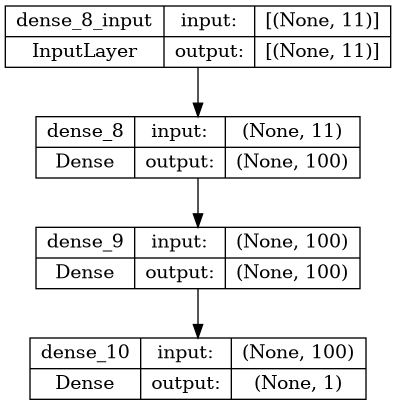

In [23]:
plot_model(model=insurance_model_2, show_shapes=True)

In [24]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3520.4922 - mae: 3520.4922


[3520.4921875, 3520.4921875]

In [25]:
tf.random.set_seed(42)

# 1.Create a model
wandb.init(project="insurance_regression", name="Dense:100,100,1.Adam.E:500")
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# 3. Fit model
insurance_model_3.fit(X_train, y_train, epochs=500, callbacks=[WandbCallback()])

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▆▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mae,█▆▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,99
loss,3711.88354
mae,3711.88354


Epoch 1/500
34/34 [==============================] - 0s 1ms/step - loss: 13209.8232 - mae: 13209.8232
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 12520.7529 - mae: 12520.7529
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 10533.2471 - mae: 10533.2471
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 7897.0815 - mae: 7897.0815
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 7429.7026 - mae: 7429.7026
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 7383.1040 - mae: 7383.1040
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 7332.8320 - mae: 7332.8320
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 7293.1030 - mae: 7293.1030
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 7251.9917 - mae: 7251.9917
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 7211.8594 - mae: 721

34/34 [==============================] - 0s 989us/step - loss: 3738.8921 - mae: 3738.8921
Epoch 82/500
34/34 [==============================] - 0s 1ms/step - loss: 3743.4492 - mae: 3743.4492
Epoch 83/500
34/34 [==============================] - 0s 961us/step - loss: 3740.6936 - mae: 3740.6936
Epoch 84/500
34/34 [==============================] - 0s 961us/step - loss: 3750.0750 - mae: 3750.0750
Epoch 85/500
34/34 [==============================] - 0s 967us/step - loss: 3733.4888 - mae: 3733.4888
Epoch 86/500
34/34 [==============================] - 0s 949us/step - loss: 3729.6643 - mae: 3729.6643
Epoch 87/500
34/34 [==============================] - 0s 995us/step - loss: 3724.0110 - mae: 3724.0110
Epoch 88/500
34/34 [==============================] - 0s 991us/step - loss: 3720.6348 - mae: 3720.6348
Epoch 89/500
34/34 [==============================] - 0s 1ms/step - loss: 3727.0989 - mae: 3727.0989
Epoch 90/500
34/34 [==============================] - 0s 957us/step - loss: 3713.9922 - ma

34/34 [==============================] - 0s 1ms/step - loss: 3525.5264 - mae: 3525.5264
Epoch 161/500
34/34 [==============================] - 0s 1ms/step - loss: 3515.4153 - mae: 3515.4153
Epoch 162/500
34/34 [==============================] - 0s 1ms/step - loss: 3507.2883 - mae: 3507.2883
Epoch 163/500
34/34 [==============================] - 0s 1ms/step - loss: 3505.9885 - mae: 3505.9885
Epoch 164/500
34/34 [==============================] - 0s 1ms/step - loss: 3524.4092 - mae: 3524.4092
Epoch 165/500
34/34 [==============================] - 0s 1ms/step - loss: 3521.4578 - mae: 3521.4578
Epoch 166/500
34/34 [==============================] - 0s 1ms/step - loss: 3501.9463 - mae: 3501.9463
Epoch 167/500
34/34 [==============================] - 0s 1ms/step - loss: 3506.8826 - mae: 3506.8826
Epoch 168/500
34/34 [==============================] - 0s 1ms/step - loss: 3496.5564 - mae: 3496.5564
Epoch 169/500
34/34 [==============================] - 0s 1ms/step - loss: 3491.3530 - mae: 3491

34/34 [==============================] - 0s 957us/step - loss: 3495.7314 - mae: 3495.7314
Epoch 240/500
34/34 [==============================] - 0s 1ms/step - loss: 3490.2881 - mae: 3490.2881
Epoch 241/500
34/34 [==============================] - 0s 997us/step - loss: 3486.0515 - mae: 3486.0515
Epoch 242/500
34/34 [==============================] - 0s 976us/step - loss: 3494.3821 - mae: 3494.3821
Epoch 243/500
34/34 [==============================] - 0s 1ms/step - loss: 3486.4680 - mae: 3486.4680
Epoch 244/500
34/34 [==============================] - 0s 997us/step - loss: 3501.7422 - mae: 3501.7422
Epoch 245/500
34/34 [==============================] - 0s 1ms/step - loss: 3504.4407 - mae: 3504.4407
Epoch 246/500
34/34 [==============================] - 0s 2ms/step - loss: 3486.4749 - mae: 3486.4749
Epoch 247/500
34/34 [==============================] - 0s 968us/step - loss: 3479.3940 - mae: 3479.3940
Epoch 248/500
34/34 [==============================] - 0s 939us/step - loss: 3500.0645

34/34 [==============================] - 0s 978us/step - loss: 3491.8389 - mae: 3491.8389
Epoch 319/500
34/34 [==============================] - 0s 1ms/step - loss: 3479.6641 - mae: 3479.6641
Epoch 320/500
34/34 [==============================] - 0s 1ms/step - loss: 3482.0425 - mae: 3482.0425
Epoch 321/500
34/34 [==============================] - 0s 998us/step - loss: 3493.4551 - mae: 3493.4551
Epoch 322/500
34/34 [==============================] - 0s 1ms/step - loss: 3485.9895 - mae: 3485.9895
Epoch 323/500
34/34 [==============================] - 0s 985us/step - loss: 3481.0771 - mae: 3481.0771
Epoch 324/500
34/34 [==============================] - 0s 992us/step - loss: 3497.0032 - mae: 3497.0032
Epoch 325/500
34/34 [==============================] - 0s 991us/step - loss: 3478.9629 - mae: 3478.9629
Epoch 326/500
34/34 [==============================] - 0s 979us/step - loss: 3491.7717 - mae: 3491.7717
Epoch 327/500
34/34 [==============================] - 0s 990us/step - loss: 3485.74

34/34 [==============================] - 0s 987us/step - loss: 3496.7249 - mae: 3496.7249
Epoch 398/500
34/34 [==============================] - 0s 1ms/step - loss: 3514.4292 - mae: 3514.4292
Epoch 399/500
34/34 [==============================] - 0s 977us/step - loss: 3477.5984 - mae: 3477.5984
Epoch 400/500
34/34 [==============================] - 0s 1ms/step - loss: 3476.4954 - mae: 3476.4954
Epoch 401/500
34/34 [==============================] - 0s 1ms/step - loss: 3487.1514 - mae: 3487.1514
Epoch 402/500
34/34 [==============================] - 0s 1ms/step - loss: 3482.0090 - mae: 3482.0090
Epoch 403/500
34/34 [==============================] - 0s 965us/step - loss: 3487.6125 - mae: 3487.6125
Epoch 404/500
34/34 [==============================] - 0s 968us/step - loss: 3506.0583 - mae: 3506.0583
Epoch 405/500
34/34 [==============================] - 0s 974us/step - loss: 3483.4546 - mae: 3483.4546
Epoch 406/500
34/34 [==============================] - 0s 965us/step - loss: 3494.6729

34/34 [==============================] - 0s 1ms/step - loss: 3508.9678 - mae: 3508.9678
Epoch 477/500
34/34 [==============================] - 0s 957us/step - loss: 3496.5508 - mae: 3496.5508
Epoch 478/500
34/34 [==============================] - 0s 991us/step - loss: 3491.8347 - mae: 3491.8347
Epoch 479/500
34/34 [==============================] - 0s 1ms/step - loss: 3478.0789 - mae: 3478.0789
Epoch 480/500
34/34 [==============================] - 0s 968us/step - loss: 3493.9646 - mae: 3493.9646
Epoch 481/500
34/34 [==============================] - 0s 1ms/step - loss: 3479.5818 - mae: 3479.5818
Epoch 482/500
34/34 [==============================] - 0s 1ms/step - loss: 3490.1060 - mae: 3490.1060
Epoch 483/500
34/34 [==============================] - 0s 1ms/step - loss: 3486.4561 - mae: 3486.4561
Epoch 484/500
34/34 [==============================] - 0s 1ms/step - loss: 3478.6465 - mae: 3478.6465
Epoch 485/500
34/34 [==============================] - 0s 941us/step - loss: 3505.4939 - m

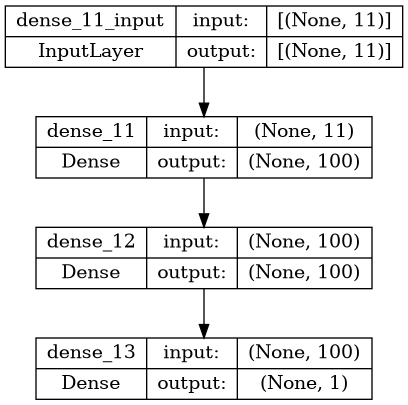

In [26]:
plot_model(model=insurance_model_3, show_shapes=True)

In [27]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3159.6069 - mae: 3159.6069


[3159.60693359375, 3159.60693359375]

In [29]:
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7387.1963 - mae: 7387.1963


[7387.1962890625, 7387.1962890625]

In [34]:
tf.random.set_seed(42)

# 1. Create model
wandb.init(project="insurance_regression", name="Dense:100,100,10,1.Adam.E:500")
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# 3. Fit model
insurance_model_4.fit(X_train, y_train, epochs=500, callbacks=[WandbCallback()])

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13132.4980 - mae: 13132.4980
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 11524.7441 - mae: 11524.7441
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 7899.3721 - mae: 7899.3721
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 7408.5356 - mae: 7408.5356
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 7324.8677 - mae: 7324.8677
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 7273.0942 - mae: 7273.0942
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 7205.1309 - mae: 7205.1309
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 7139.6719 - mae: 7139.6719
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7073.6250 - mae: 7073.6250
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7005.5273 - mae: 7005.

34/34 [==============================] - 0s 1ms/step - loss: 3683.5159 - mae: 3683.5159
Epoch 83/500
34/34 [==============================] - 0s 1ms/step - loss: 3612.6113 - mae: 3612.6113
Epoch 84/500
34/34 [==============================] - 0s 1ms/step - loss: 3647.8005 - mae: 3647.8005
Epoch 85/500
34/34 [==============================] - 0s 1ms/step - loss: 3574.7449 - mae: 3574.7449
Epoch 86/500
34/34 [==============================] - 0s 1ms/step - loss: 3589.7732 - mae: 3589.7732
Epoch 87/500
34/34 [==============================] - 0s 1ms/step - loss: 3563.9495 - mae: 3563.9495
Epoch 88/500
34/34 [==============================] - 0s 1ms/step - loss: 3573.8281 - mae: 3573.8281
Epoch 89/500
34/34 [==============================] - 0s 1ms/step - loss: 3555.4446 - mae: 3555.4446
Epoch 90/500
34/34 [==============================] - 0s 2ms/step - loss: 3561.9365 - mae: 3561.9365
Epoch 91/500
34/34 [==============================] - 0s 2ms/step - loss: 3565.4001 - mae: 3565.4001
Epo

34/34 [==============================] - 0s 2ms/step - loss: 3489.5288 - mae: 3489.5288
Epoch 163/500
34/34 [==============================] - 0s 2ms/step - loss: 3490.4009 - mae: 3490.4009
Epoch 164/500
34/34 [==============================] - 0s 2ms/step - loss: 3512.5354 - mae: 3512.5354
Epoch 165/500
34/34 [==============================] - 0s 1ms/step - loss: 3529.6101 - mae: 3529.6101
Epoch 166/500
34/34 [==============================] - 0s 1ms/step - loss: 3491.6685 - mae: 3491.6685
Epoch 167/500
34/34 [==============================] - 0s 2ms/step - loss: 3487.9045 - mae: 3487.9045
Epoch 168/500
34/34 [==============================] - 0s 2ms/step - loss: 3494.6152 - mae: 3494.6152
Epoch 169/500
34/34 [==============================] - 0s 2ms/step - loss: 3492.1956 - mae: 3492.1956
Epoch 170/500
34/34 [==============================] - 0s 2ms/step - loss: 3494.1719 - mae: 3494.1719
Epoch 171/500
34/34 [==============================] - 0s 2ms/step - loss: 3497.7170 - mae: 3497

34/34 [==============================] - 0s 1ms/step - loss: 3493.7666 - mae: 3493.7666
Epoch 243/500
34/34 [==============================] - 0s 1ms/step - loss: 3494.9646 - mae: 3494.9646
Epoch 244/500
34/34 [==============================] - 0s 3ms/step - loss: 3497.3562 - mae: 3497.3562
Epoch 245/500
34/34 [==============================] - 0s 2ms/step - loss: 3510.7214 - mae: 3510.7214
Epoch 246/500
34/34 [==============================] - 0s 4ms/step - loss: 3484.9375 - mae: 3484.9375
Epoch 247/500
34/34 [==============================] - 0s 2ms/step - loss: 3495.7676 - mae: 3495.7676
Epoch 248/500
34/34 [==============================] - 0s 1ms/step - loss: 3507.4004 - mae: 3507.4004
Epoch 249/500
34/34 [==============================] - 0s 1ms/step - loss: 3509.0164 - mae: 3509.0164
Epoch 250/500
34/34 [==============================] - 0s 1ms/step - loss: 3499.8269 - mae: 3499.8269
Epoch 251/500
34/34 [==============================] - 0s 1ms/step - loss: 3491.5200 - mae: 3491

34/34 [==============================] - 0s 1ms/step - loss: 3498.1494 - mae: 3498.1494
Epoch 323/500
34/34 [==============================] - 0s 1ms/step - loss: 3503.6067 - mae: 3503.6067
Epoch 324/500
34/34 [==============================] - 0s 1ms/step - loss: 3514.0771 - mae: 3514.0771
Epoch 325/500
34/34 [==============================] - 0s 1ms/step - loss: 3501.3677 - mae: 3501.3677
Epoch 326/500
34/34 [==============================] - 0s 1ms/step - loss: 3518.8953 - mae: 3518.8953
Epoch 327/500
34/34 [==============================] - 0s 1ms/step - loss: 3496.9785 - mae: 3496.9785
Epoch 328/500
34/34 [==============================] - 0s 1ms/step - loss: 3496.0806 - mae: 3496.0806
Epoch 329/500
34/34 [==============================] - 0s 1ms/step - loss: 3519.6909 - mae: 3519.6909
Epoch 330/500
34/34 [==============================] - 0s 1ms/step - loss: 3495.8840 - mae: 3495.8840
Epoch 331/500
34/34 [==============================] - 0s 1ms/step - loss: 3521.9368 - mae: 3521

34/34 [==============================] - 0s 1ms/step - loss: 3490.4326 - mae: 3490.4326
Epoch 403/500
34/34 [==============================] - 0s 1ms/step - loss: 3498.6011 - mae: 3498.6011
Epoch 404/500
34/34 [==============================] - 0s 1ms/step - loss: 3514.5947 - mae: 3514.5947
Epoch 405/500
34/34 [==============================] - 0s 1ms/step - loss: 3492.6172 - mae: 3492.6172
Epoch 406/500
34/34 [==============================] - 0s 1ms/step - loss: 3501.7512 - mae: 3501.7512
Epoch 407/500
34/34 [==============================] - 0s 1ms/step - loss: 3503.6191 - mae: 3503.6191
Epoch 408/500
34/34 [==============================] - 0s 1ms/step - loss: 3503.4421 - mae: 3503.4421
Epoch 409/500
34/34 [==============================] - 0s 1ms/step - loss: 3503.4392 - mae: 3503.4392
Epoch 410/500
34/34 [==============================] - 0s 1ms/step - loss: 3495.2092 - mae: 3495.2092
Epoch 411/500
34/34 [==============================] - 0s 1ms/step - loss: 3505.6006 - mae: 3505

34/34 [==============================] - 0s 1ms/step - loss: 3499.0742 - mae: 3499.0742
Epoch 483/500
34/34 [==============================] - 0s 1ms/step - loss: 3489.9729 - mae: 3489.9729
Epoch 484/500
34/34 [==============================] - 0s 2ms/step - loss: 3489.7454 - mae: 3489.7454
Epoch 485/500
34/34 [==============================] - 0s 1ms/step - loss: 3502.8167 - mae: 3502.8167
Epoch 486/500
34/34 [==============================] - 0s 1ms/step - loss: 3520.4539 - mae: 3520.4539
Epoch 487/500
34/34 [==============================] - 0s 1ms/step - loss: 3501.2549 - mae: 3501.2549
Epoch 488/500
34/34 [==============================] - 0s 1ms/step - loss: 3492.4485 - mae: 3492.4485
Epoch 489/500
34/34 [==============================] - 0s 1ms/step - loss: 3483.2864 - mae: 3483.2864
Epoch 490/500
34/34 [==============================] - 0s 1ms/step - loss: 3485.4180 - mae: 3485.4180
Epoch 491/500
34/34 [==============================] - 0s 1ms/step - loss: 3516.1736 - mae: 3516

In [35]:
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3177.1484 - mae: 3177.1484


[3177.1484375, 3177.1484375]

**Question:** How long should you train for?

It depends. Really... it dpends on the problem you're working on. However, many people have asked this question before. so TnesorFlow has a solution! It's called the [Early Stopping Callback], which is a TensorFlow component.

# Preprocessing data (normalization and standardization)

In term of scaling values, nn tend to prefer normalization.

If you're not sure on  which to use, you could trye both.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [48]:
# Reload the TensorBoard notebook extention
%reload_ext tensorboard

In [49]:
import datetime

In [52]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [56]:
# Read in the insurance dataset
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we cn borrow a few classes from Scikit-learn

In [85]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column trainsformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMax Scaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [86]:
# WHat does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [87]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [88]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [90]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [105]:
# Build your neural network
tf.random.set_seed(42)

# Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="dense-100"),
    tf.keras.layers.Dense(10, name="dense-10"),
    tf.keras.layers.Dense(1, name="dense-1")
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Convert processed data to TensorFlow tensors
X_train_normal = tf.convert_to_tensor(X_train_normal, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

# Set up TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S_ostatni")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    profile_batch=0,
    write_images=True,
    embeddings_freq=1,
    embeddings_metadata='metadata.tsv',
    update_freq='epoch'
)



# Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100, callbacks=[tensorboard_callback])

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 13343.2520 - mae: 13343.2520
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13333.1631 - mae: 13333.1631
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13309.2188 - mae: 13309.2188
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13260.2949 - mae: 13260.2949
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13174.5879 - mae: 13174.5879
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13041.0322 - mae: 13041.0322
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12849.6611 - mae: 12849.6611
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12590.6211 - mae: 12590.6211
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12253.9141 - mae: 12253.9141
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11838.11

34/34 [==============================] - 0s 4ms/step - loss: 3672.5015 - mae: 3672.5015
Epoch 82/100
34/34 [==============================] - 0s 3ms/step - loss: 3669.8608 - mae: 3669.8608
Epoch 83/100
34/34 [==============================] - 0s 3ms/step - loss: 3664.3208 - mae: 3664.3208
Epoch 84/100
34/34 [==============================] - 0s 3ms/step - loss: 3661.9961 - mae: 3661.9961
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 3659.5691 - mae: 3659.5691
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 3658.2512 - mae: 3658.2512
Epoch 87/100
34/34 [==============================] - 0s 3ms/step - loss: 3655.3870 - mae: 3655.3870
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 3653.2473 - mae: 3653.2473
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 3651.9900 - mae: 3651.9900
Epoch 90/100
34/34 [==============================] - 0s 4ms/step - loss: 3650.0842 - mae: 3650.0842
Epo

In [106]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15002), started 0:59:19 ago. (Use '!kill 15002' to kill it.)